In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Import the necessary libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [3]:
#Create dataframe by reading given input csv file using pandas

df = pd.read_csv("/Users/Rattlehead/Downloads/GreatLakes/vehicle.csv")

In [4]:
#Display the data types of dataframe

df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
# 5 point summary of numerical attributes can be seen using describe

df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [6]:
# From the count of each variable it can be inferred that we have missing values in the dataframe

In [7]:
#Display the heade of dataframe

df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [8]:
#Display the shape of dataframe

df.shape

(846, 19)

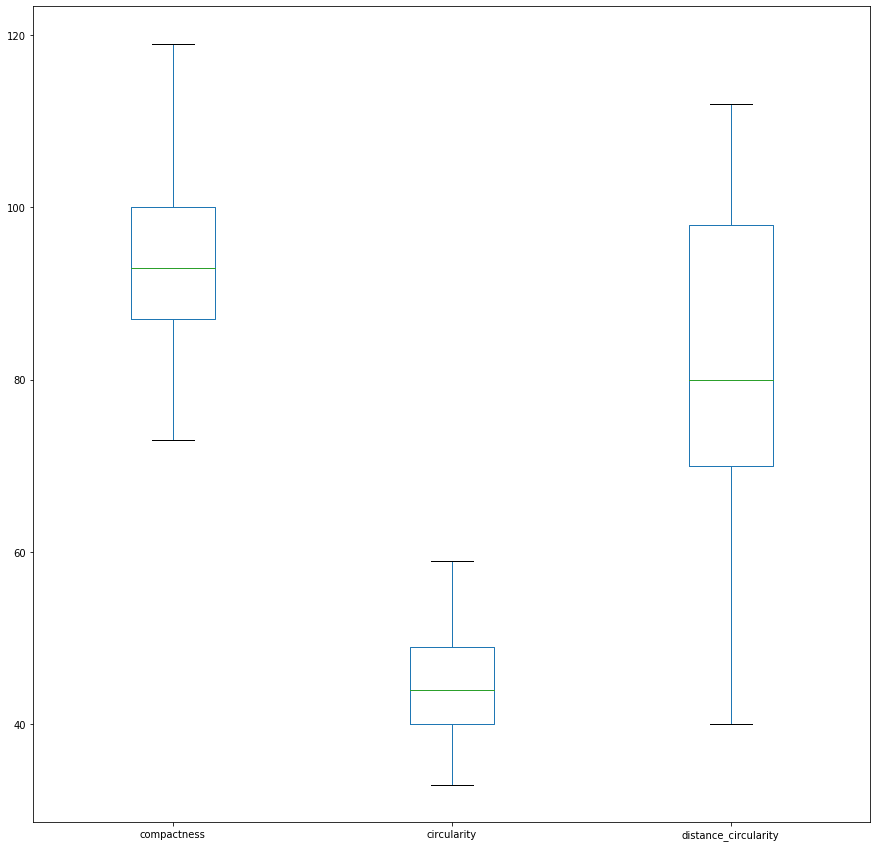

In [9]:
#Box Plot for Columns compactness, circularity and distance_circularity

df.boxplot(grid = False, column=["compactness", "circularity", "distance_circularity"],
           figsize = (15, 15))

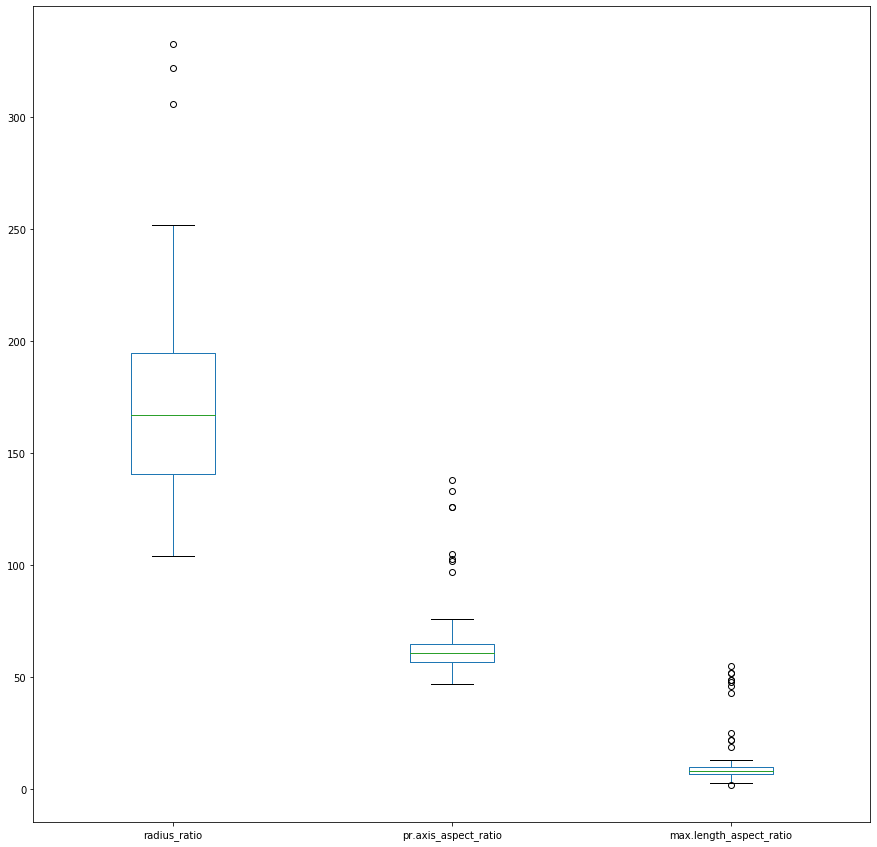

In [10]:
#Box Plot for Columns radius_ratio, pr.axis_aspect_ratio and max.length_aspect_ratio

df.boxplot(grid = False, column=["radius_ratio", "pr.axis_aspect_ratio", "max.length_aspect_ratio"],
           figsize = (15, 15))

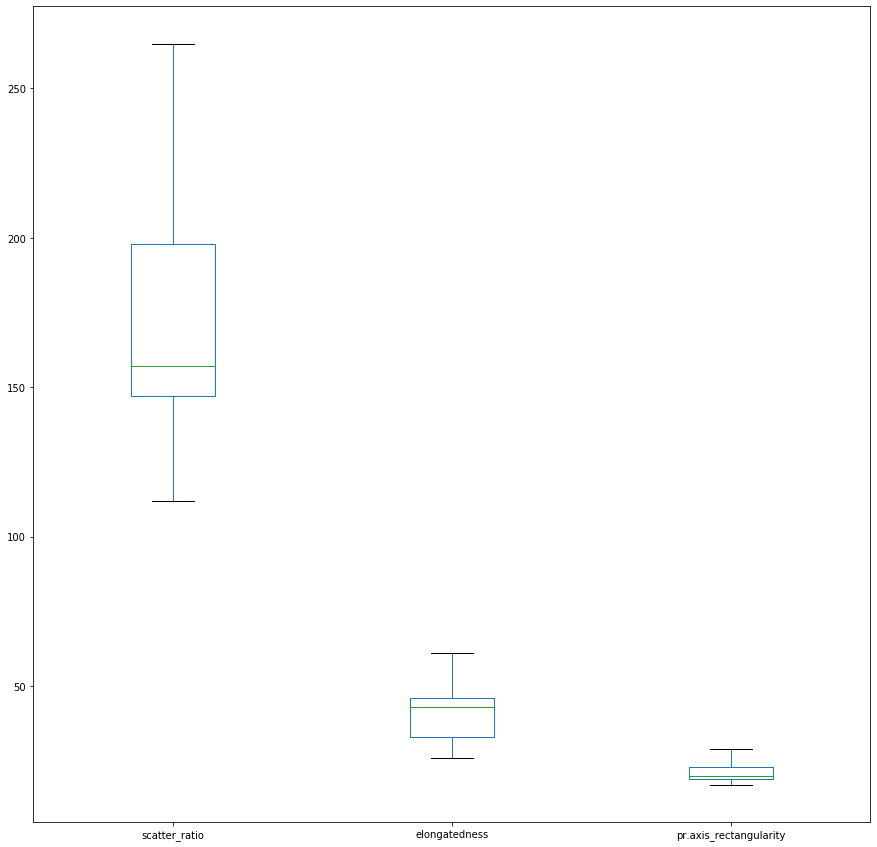

In [11]:
#Box Plot for Columns scatter_ratio, elongatedness and pr.axis_rectangularity

df.boxplot(grid = False, column=["scatter_ratio", "elongatedness", "pr.axis_rectangularity"], figsize = (15, 15))

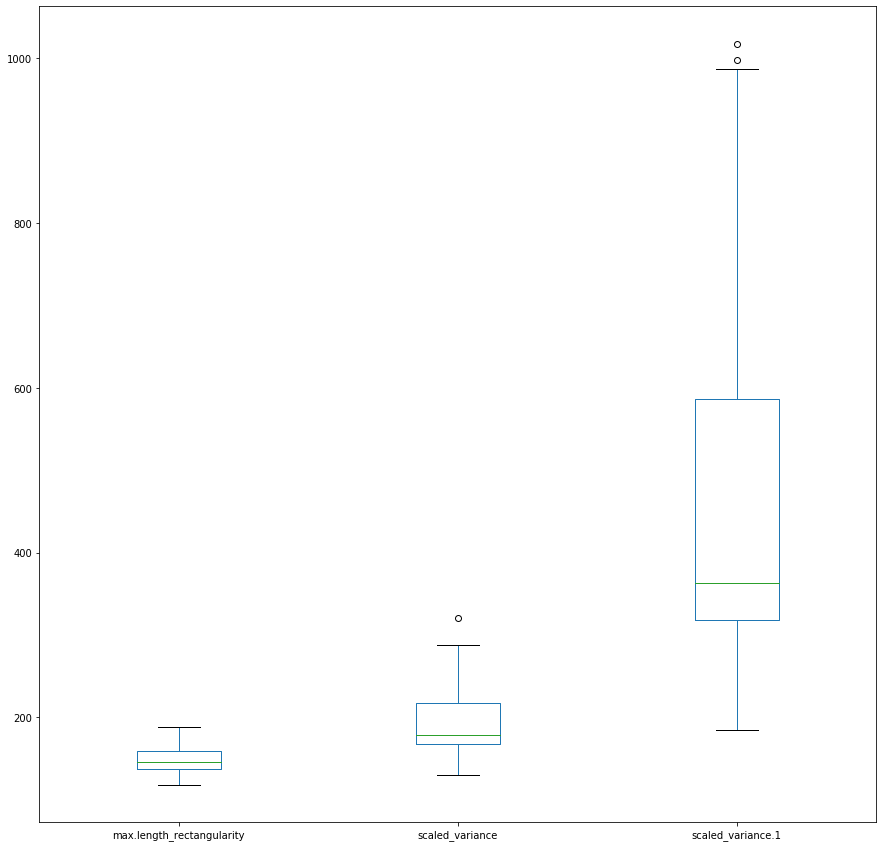

In [12]:
#Box Plot for Columns max.length_rectangularity, scaled_variance and scaled_variance.1

df.boxplot(grid = False, column=["max.length_rectangularity", "scaled_variance", "scaled_variance.1"],
           figsize = (15, 15))

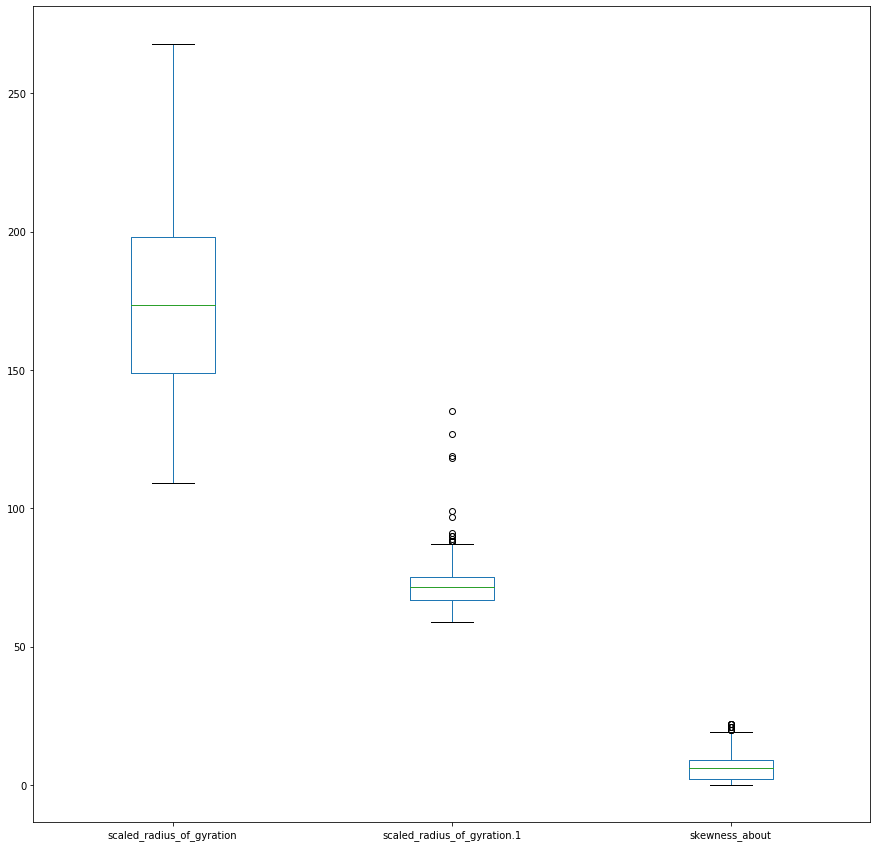

In [13]:
#Box Plot for Columns scaled_radius_of_gyration, scaled_radius_of_gyration.1 and skewness_about

df.boxplot(grid = False, column=["scaled_radius_of_gyration", "scaled_radius_of_gyration.1", "skewness_about"],
           figsize =(15,15))

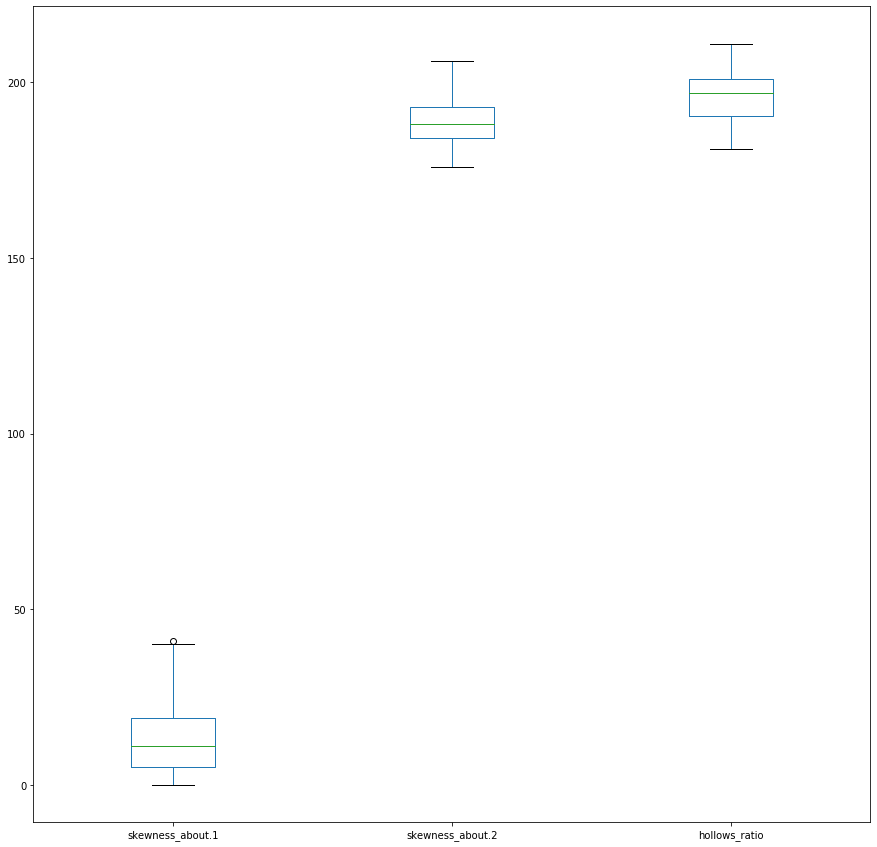

In [14]:
#Box Plot for Columns skewness_about.1, skewness_about.2 and hollows_ratio

df.boxplot(grid = False, column=["skewness_about.1", "skewness_about.2", "hollows_ratio"],
           figsize =(15,15))

In [15]:
#As it can be observed we have few outliers among certain variables

In [16]:
#Modify class's data type from object to numeric
print(df['class'].unique())
df['class'].replace("van",'1', inplace=True)
df['class'].replace("car",'2', inplace=True)
df['class'].replace("bus",'3', inplace=True)

#Change the data type pf class from Object to int
df['class'] = df['class'].astype(int)
df.dtypes

['van' 'car' 'bus']


compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int64
dtype: object

In [17]:
#Display the correlation of variables amongst each other

df.corr(method="pearson")

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.689786,0.791707,0.691081,0.091779,0.148249,0.812770,-0.788736,0.814248,0.676143,0.764361,0.818674,0.585845,-0.250603,0.236685,0.157670,0.298528,0.365552,0.033796
circularity,0.689786,1.000000,0.797180,0.625051,0.154283,0.251407,0.858265,-0.827246,0.856603,0.965729,0.806791,0.850863,0.935950,0.053080,0.144968,-0.011869,-0.106339,0.045652,0.160546
distance_circularity,0.791707,0.797180,1.000000,0.771748,0.158684,0.264621,0.907949,-0.913020,0.896273,0.775149,0.865710,0.890541,0.706950,-0.227001,0.114665,0.266049,0.146027,0.333648,0.065209
radius_ratio,0.691081,0.625051,0.771748,1.000000,0.665363,0.450486,0.738480,-0.792946,0.712744,0.571083,0.798294,0.725598,0.541325,-0.181520,0.049112,0.174469,0.382912,0.472339,0.182921
pr.axis_aspect_ratio,0.091779,0.154283,0.158684,0.665363,1.000000,0.648861,0.103832,-0.183492,0.079566,0.127322,0.273738,0.089750,0.122454,0.152860,-0.058539,-0.032180,0.240201,0.267760,0.098431
max.length_aspect_ratio,0.148249,0.251407,0.264621,0.450486,0.648861,1.000000,0.165998,-0.180053,0.161603,0.305943,0.319033,0.143745,0.189752,0.295638,0.015446,0.043491,-0.026184,0.143919,-0.207619
scatter_ratio,0.812770,0.858265,0.907949,0.738480,0.103832,0.165998,1.000000,-0.973504,0.992078,0.810017,0.951672,0.996328,0.800577,-0.028006,0.074376,0.213512,0.005171,0.118504,0.288904
elongatedness,-0.788736,-0.827246,-0.913020,-0.792946,-0.183492,-0.180053,-0.973504,1.000000,-0.950405,-0.776150,-0.938313,-0.956488,-0.766671,0.103535,-0.052243,-0.186027,-0.114846,-0.216769,-0.339348
pr.axis_rectangularity,0.814248,0.856603,0.896273,0.712744,0.079566,0.161603,0.992078,-0.950405,1.000000,0.813135,0.938182,0.992316,0.798522,-0.015711,0.083219,0.215200,-0.019066,0.099481,0.259102
max.length_rectangularity,0.676143,0.965729,0.775149,0.571083,0.127322,0.305943,0.810017,-0.776150,0.813135,1.000000,0.746657,0.797485,0.866554,0.041283,0.136077,0.001660,-0.104437,0.076770,0.032399


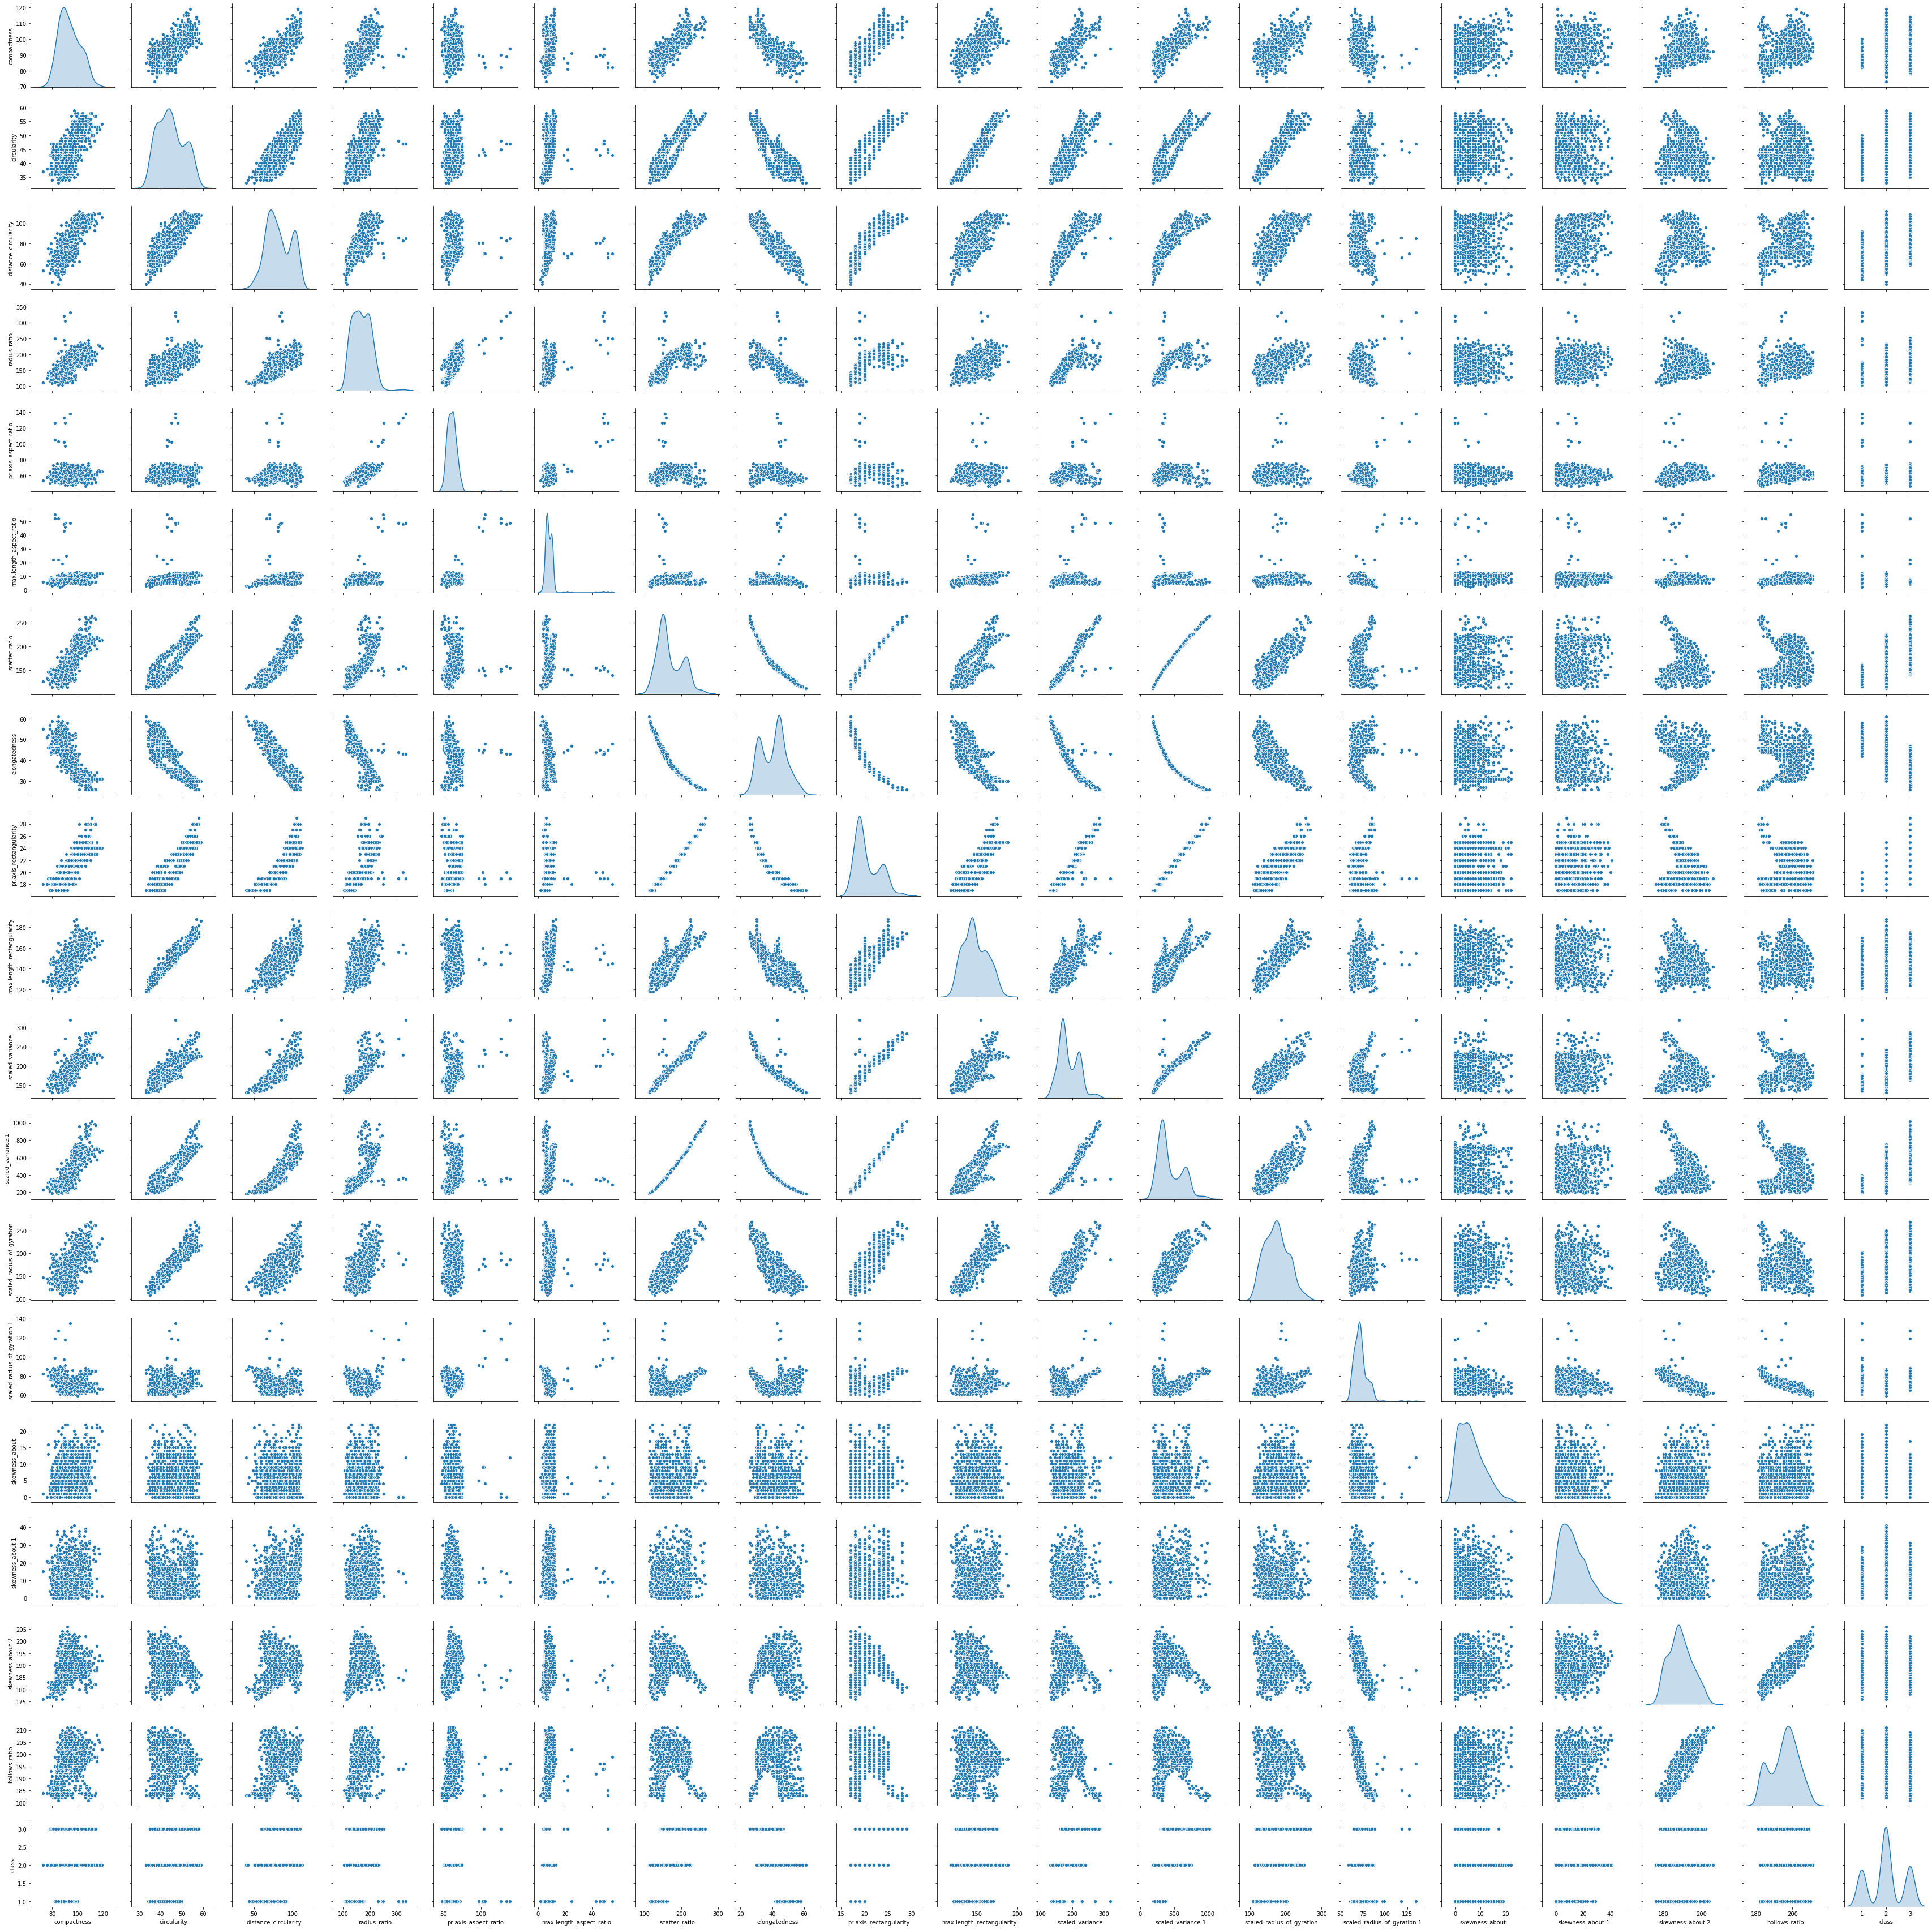

In [18]:
#circularity shows high significance with distance_circularity, scatter_ratio, pr.axis_rectangularity,
#max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration

#Target variable shows some significance with above variables but low significance with variables like
#distance_circularity, max.length_rectangularity, skewness_about.1 and skewness_about.2

#Display pair plot
sns.pairplot(df, diag_kind='kde')

In [19]:
#We can observe strong relationship between circularity and scaled_radius_of_gyration, scaled_variance.1,
#scaled_variance, max.length_rectangularity, elongatedness, scatter_ratio and distance_circularity

#Similarly we can observe relationship between distance_circularity and scatter_ratio, elongatedness,
#pr.axis_rectangularity, max.length_rectangularity, scaled_variance and scaled_variance.1

#We see some off relationship between pr.axis_aspect_ratio and class
#and also between max.length_aspect_ratio and class but we cannot rule out them variables
#as we will be losing information because we still have data points for all classes

In [20]:
#Check for missing values
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [21]:
#Print the unique values for lets say circularity
df['circularity'].unique()

array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

In [22]:
#Get rid of nan values by using Imputer
imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imputed_df = pd.DataFrame(imr.fit_transform(df), columns = df.columns).astype(df.dtypes.to_dict())

#Check for nan again
imputed_df.isna().sum()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [23]:
#Check for duplicate rows

dups = imputed_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [24]:
#Separate Target and Feature Variables
X = imputed_df.iloc[:,:-1]
Y = np.array(imputed_df['class'])

In [25]:
#Based on our ealier observation from box plots we noticed few outliers

#Check for outliers for compactness
print(pd.crosstab(X['compactness'], imputed_df['class']))

#We can see the grouping below 109 and above 85
X['compactness'] = np.where(X['compactness'] > 109, 109, X['compactness'])
X['compactness'] = np.where(X['compactness'] < 85, 85, X['compactness'])

class         1   2   3
compactness            
73            0   1   0
76            0   1   0
77            0   2   0
78            0   3   1
79            0   3   2
80            0   6   6
81            0   1  12
82            1   7  11
83            5   4   8
84            4   9   7
85           12  14  19
86           14  15  19
87            7   9  12
88           12  15   7
89           29  23   8
90           23  15   4
91           14  19   6
92            7  14   4
93           22  19   4
94           17   8  10
95           10  13   4
96            9  12   9
97            5  19   6
98            6  15   9
99            0  11   6
100           2  16   8
101           0  19   4
102           0  12   5
103           0  17   1
104           0  25   2
105           0  14   3
106           0  14   5
107           0  14   5
108           0  12   2
109           0  11   3
110           0   4   3
111           0   3   1
112           0   2   0
113           0   2   1
114           0 

In [26]:
#Check for outliers for circularity
print(pd.crosstab(X['circularity'], imputed_df['class']))
X['circularity'] = np.where(X['circularity'] > 48, 48, X['circularity'])
X['circularity'] = np.where(X['circularity'] < 36, 36, X['circularity'])

class         1   2   3
circularity            
33.0          0   2   0
34.0          2   7   0
35.0          8   7   1
36.0         13  25   3
37.0         14  21   7
38.0          8  33   6
39.0         15  22   5
40.0         15  21   6
41.0         13  11  11
42.0         15  10  22
43.0         15  11  33
44.0         14  12  29
45.0         16  17  25
46.0         17  17  14
47.0         16  10  10
48.0         12  17   2
49.0          5  16   7
50.0          1  12   3
51.0          0  22   7
52.0          0  24   4
53.0          0  27   3
54.0          0  34   5
55.0          0  29   4
56.0          0  11   4
57.0          0   7   5
58.0          0   3   2
59.0          0   1   0


In [27]:
#Check for outliers for distance_circularity
print(pd.crosstab(X['distance_circularity'], imputed_df['class']))
X['distance_circularity'] = np.where(X['distance_circularity'] > 105, 105, X['distance_circularity'])
X['distance_circularity'] = np.where(X['distance_circularity'] < 65, 65, X['distance_circularity'])

class                 1   2  3
distance_circularity          
40.0                  0   1  0
42.0                  0   1  0
44.0                  1   0  0
47.0                  1   0  0
49.0                  1   0  0
...                  ..  .. ..
107.0                 0  12  1
108.0                 0  17  0
109.0                 0  13  2
110.0                 0   4  0
112.0                 0   1  0

[63 rows x 3 columns]


In [28]:
#Check for outliers for radius_ratio
print(pd.crosstab(X['radius_ratio'], imputed_df['class']))
X['radius_ratio'] = np.where(X['radius_ratio'] > 195, 195, X['radius_ratio'])
X['radius_ratio'] = np.where(X['radius_ratio'] < 145, 145, X['radius_ratio'])

class         1  2  3
radius_ratio         
104.0         0  1  0
105.0         1  0  0
109.0         1  0  0
110.0         2  1  0
111.0         3  1  0
...          .. .. ..
250.0         1  0  0
252.0         0  0  1
306.0         1  0  0
322.0         1  0  0
333.0         1  0  0

[134 rows x 3 columns]


In [29]:
#Check for outliers for pr.axis_aspect_ratio
print(pd.crosstab(X['pr.axis_aspect_ratio'], imputed_df['class']))
X['pr.axis_aspect_ratio'] = np.where(X['pr.axis_aspect_ratio'] > 70, 70, X['pr.axis_aspect_ratio'])
X['pr.axis_aspect_ratio'] = np.where(X['pr.axis_aspect_ratio'] < 53, 53, X['pr.axis_aspect_ratio'])

class                  1   2   3
pr.axis_aspect_ratio            
47.0                   0   0   2
48.0                   3   0   1
49.0                   2   0   1
50.0                   1   1   3
51.0                   3   1   7
52.0                   9   2   3
53.0                   6  13   8
54.0                  10  16  12
55.0                  11  19   7
56.0                  16  28  13
57.0                   8  29   7
58.0                  17  22   4
59.0                  15  43   6
60.0                   8  33   5
61.0                   8  27   9
62.0                  10  42   6
63.0                  13  28   4
64.0                  22  30  17
65.0                   5  20  13
66.0                  10  17  10
67.0                   5  16   7
68.0                   7  15  12
69.0                   2  10  13
70.0                   1   7  10
71.0                   0   5  10
72.0                   1   2   7
73.0                   0   1   6
74.0                   0   2   7
75.0      

In [30]:
#Check for outliers for max.length_aspect_ratio
print(pd.crosstab(X['max.length_aspect_ratio'], imputed_df['class']))
X['max.length_aspect_ratio'] = np.where(X['max.length_aspect_ratio'] > 12, 12, X['max.length_aspect_ratio'])
X['max.length_aspect_ratio'] = np.where(X['max.length_aspect_ratio'] < 5, 5, X['max.length_aspect_ratio'])

class                     1   2   3
max.length_aspect_ratio            
2                         1   0   0
3                         2   2   0
4                         2   9   7
5                        10  15  26
6                        19  35  78
7                        26  62  80
8                        33  58  22
9                        34  60   0
10                       32  80   0
11                       30  78   0
12                        3  27   0
13                        0   3   0
19                        0   0   1
22                        0   0   2
25                        1   0   0
43                        1   0   0
46                        1   0   0
48                        1   0   0
49                        2   0   0
52                        0   0   2
55                        1   0   0


In [31]:
#Check for outliers for scatter_ratio
print(pd.crosstab(X['scatter_ratio'], imputed_df['class']))
X['scatter_ratio'] = np.where(X['scatter_ratio'] > 200, 200, X['scatter_ratio'])
X['scatter_ratio'] = np.where(X['scatter_ratio'] < 145, 145, X['scatter_ratio'])

class          1  2  3
scatter_ratio         
112.0          0  1  0
114.0          2  2  0
115.0          1  1  0
116.0          2  1  0
117.0          2  0  0
...           .. .. ..
257.0          0  0  3
260.0          0  0  1
261.0          0  0  1
262.0          0  0  1
265.0          0  0  1

[131 rows x 3 columns]


In [32]:
#Check for outliers for elongatedness
print(pd.crosstab(X['elongatedness'], imputed_df['class']))
X['elongatedness'] = np.where(X['elongatedness'] > 52, 52, X['elongatedness'])
X['elongatedness'] = np.where(X['elongatedness'] < 30, 30, X['elongatedness'])

class           1   2   3
elongatedness            
26.0            0   0  10
27.0            0   0   7
28.0            0   0   7
29.0            0   0   2
30.0            0  46   4
31.0            0  69   4
32.0            0  39   5
33.0            0  23   5
34.0            0  17   4
35.0            0  19   6
36.0            0  13   6
37.0            0  14   4
38.0            0  13   5
39.0            0  12   6
40.0            0  14   5
41.0            0  15   7
42.0            6  13   8
43.0           38  10  13
44.0           29  15  28
45.0           11  14  48
46.0           14  12  33
47.0            6   7   1
48.0           11  12   0
49.0           10   6   0
50.0           13  12   0
51.0           10   8   0
52.0           14   6   0
53.0            8   2   0
54.0            4   6   0
55.0            6   4   0
56.0            5   1   0
57.0           11   1   0
58.0            3   1   0
59.0            0   4   0
61.0            0   1   0


In [33]:
#Check for outliers for pr.axis_rectangularity
print(pd.crosstab(X['pr.axis_rectangularity'], imputed_df['class']))
X['pr.axis_rectangularity'] = np.where(X['pr.axis_rectangularity'] > 25, 25, X['pr.axis_rectangularity'])

class                    1   2    3
pr.axis_rectangularity             
17.0                    31  12    0
18.0                    72  52    5
19.0                    45  61  131
20.0                    51  49   19
21.0                     0  36   11
22.0                     0  36   12
23.0                     0  46    6
24.0                     0  83    6
25.0                     0  54    4
26.0                     0   0    9
27.0                     0   0    5
28.0                     0   0    9
29.0                     0   0    1


In [34]:
#Check for outliers for max.length_rectangularity
print(pd.crosstab(X['max.length_rectangularity'], imputed_df['class']))
X['max.length_rectangularity'] = np.where(X['max.length_rectangularity'] > 165, 165, X['max.length_rectangularity'])
X['max.length_rectangularity'] = np.where(X['max.length_rectangularity'] < 140, 140, X['max.length_rectangularity'])

class                      1  2  3
max.length_rectangularity         
118                        0  2  0
119                        0  2  0
120                        0  1  0
121                        1  1  0
122                        1  2  0
...                       .. .. ..
179                        0  1  0
180                        0  2  0
182                        0  2  0
186                        0  1  0
188                        0  1  0

[66 rows x 3 columns]


In [35]:
#Check for outliers for scaled_variance
print(pd.crosstab(X['scaled_variance'], imputed_df['class']))
X['scaled_variance'] = np.where(X['scaled_variance'] > 210, 210, X['scaled_variance'])
X['scaled_variance'] = np.where(X['scaled_variance'] < 180, 180, X['scaled_variance'])

class            1  2  3
scaled_variance         
130.0            0  1  0
131.0            0  1  0
132.0            0  1  0
134.0            1  0  0
135.0            3  3  0
...             .. .. ..
280.0            0  0  3
285.0            0  0  3
287.0            0  0  1
288.0            0  0  1
320.0            1  0  0

[128 rows x 3 columns]


In [36]:
#Check for outliers for scaled_variance.1
print(pd.crosstab(X['scaled_variance.1'], imputed_df['class']))
X['scaled_variance.1'] = np.where(X['scaled_variance.1'] > 600, 600, X['scaled_variance.1'])
X['scaled_variance.1'] = np.where(X['scaled_variance.1'] < 300, 300, X['scaled_variance.1'])

class              1  2  3
scaled_variance.1         
184.0              0  1  0
191.0              0  1  0
192.0              0  1  0
193.0              0  1  0
194.0              1  0  0
...               .. .. ..
968.0              0  0  1
982.0              0  0  1
987.0              0  0  1
998.0              0  0  1
1018.0             0  0  1

[423 rows x 3 columns]


In [37]:
#Check for outliers for scaled_radius_of_gyration
print(pd.crosstab(X['scaled_radius_of_gyration'], imputed_df['class']))
X['scaled_radius_of_gyration'] = np.where(X['scaled_radius_of_gyration'] > 200, 200, X['scaled_radius_of_gyration'])
X['scaled_radius_of_gyration'] = np.where(X['scaled_radius_of_gyration'] < 150, 150, X['scaled_radius_of_gyration'])

class                      1  2  3
scaled_radius_of_gyration         
109.0                      1  0  0
112.0                      3  0  0
113.0                      1  0  0
114.0                      0  1  0
115.0                      1  1  0
...                       .. .. ..
260.0                      0  0  1
261.0                      0  0  3
262.0                      0  0  1
264.0                      0  0  1
268.0                      0  0  1

[144 rows x 3 columns]


In [38]:
#Check for outliers for scaled_radius_of_gyration.1
print(pd.crosstab(X['scaled_radius_of_gyration.1'], imputed_df['class']))
X['scaled_radius_of_gyration.1'] = np.where(X['scaled_radius_of_gyration.1'] > 76, 76, X['scaled_radius_of_gyration.1'])
X['scaled_radius_of_gyration.1'] = np.where(X['scaled_radius_of_gyration.1'] < 64, 64, X['scaled_radius_of_gyration.1'])

class                         1   2   3
scaled_radius_of_gyration.1            
59.0                          0   1   0
60.0                          0   2   0
61.0                          2   9   0
62.0                          6  12   0
63.0                          8  16   0
64.0                         13  25   0
65.0                          8  20   3
66.0                          8  28   4
67.0                         13  35   5
68.0                          5  27   7
69.0                          9  20  15
70.0                          9  34   9
71.0                         12  43  13
71.5                          0   3   1
72.0                         14  45  16
73.0                         11  27   8
74.0                         12  29  12
75.0                         16  11  11
76.0                         10   8   7
77.0                          7   5   8
78.0                          8   2   7
79.0                          3   3   5
80.0                          3   4  11


In [39]:
#Check for outliers for skewness_about
print(pd.crosstab(X['skewness_about'], imputed_df['class']))
X['skewness_about'] = np.where(X['skewness_about'] > 16, 16, X['skewness_about'])

class            1   2   3
skewness_about            
0.0             14  44  19
1.0             21  38  22
2.0             15  29  19
3.0             13  26  17
4.0             17  25  28
5.0             14  35  22
6.0             13  29  29
7.0             20  22  18
8.0             13  19  15
9.0             10  22  14
10.0             9  21   6
11.0             7  20   4
12.0            10  18   2
13.0             6  18   2
14.0             4  14   0
15.0             4  15   0
16.0             1  10   0
17.0             5   5   1
18.0             2   4   0
19.0             1   3   0
20.0             0   3   0
21.0             0   5   0
22.0             0   4   0


In [40]:
#Check for outliers for skewness_about.1
print(pd.crosstab(X['skewness_about.1'], imputed_df['class']))
X['skewness_about.1'] = np.where(X['skewness_about.1'] > 29, 29, X['skewness_about.1'])

class              1   2   3
skewness_about.1            
0.0               10  11   9
1.0                7  16  15
2.0                9  19   9
3.0               10  14   8
4.0               10  18  13
5.0                9  20   7
6.0               12  14  11
7.0               16  16  12
8.0               10   8  14
9.0               15  17   8
10.0               9  12   8
11.0               9  19  19
12.0               8   9  11
13.0              10  12   8
14.0              10  12  16
15.0               7  12   4
16.0               9  15   7
17.0               8   4   8
18.0               3  12   2
19.0               3  11   6
20.0               3  15   4
21.0               4  22   3
22.0               1  14   5
23.0               4  12   3
24.0               0  13   0
25.0               0  10   1
26.0               1   5   3
27.0               1   5   1
28.0               0  12   1
29.0               1  11   0
30.0               0   7   1
31.0               0   4   1
32.0          

In [41]:
#Check for outliers for skewness_about.2
print(pd.crosstab(X['skewness_about.2'], imputed_df['class']))
X['skewness_about.2'] = np.where(X['skewness_about.2'] > 200, 200, X['skewness_about.2'])
X['skewness_about.2'] = np.where(X['skewness_about.2'] < 179, 179, X['skewness_about.2'])

class              1   2   3
skewness_about.2            
176.0              2   1   0
177.0              1   4   0
178.0              0   2   2
179.0              2   6  23
180.0              5  11  23
181.0              5  10  21
182.0             13   4   9
183.0             18  12   9
184.0             16   8   8
185.0             12  13   9
186.0             13  34   6
187.0              8  47   5
188.0              9  43  11
189.0             13  42   5
190.0              8  32   2
191.0              7  30   4
192.0             12  25  10
193.0              7  20   8
194.0              7  14   5
195.0              5  16  12
196.0              6   8  11
197.0              5  12   7
198.0              0  13   7
199.0              9   5   5
200.0              2   2  10
201.0              9   5   3
202.0              2   3   3
203.0              2   5   0
204.0              1   1   0
206.0              0   1   0


In [42]:
#Check for outliers for hollows_ratio
print(pd.crosstab(X['hollows_ratio'], imputed_df['class']))
X['hollows_ratio'] = np.where(X['hollows_ratio'] > 206, 206, X['hollows_ratio'])
X['hollows_ratio'] = np.where(X['hollows_ratio'] < 182, 182, X['hollows_ratio'])

class           1   2   3
hollows_ratio            
181             0   0   2
182             2   1  22
183            12   8  20
184             6   9  23
185             6   9  11
186             3   4   9
187             3   9   7
188             2   5   8
189             0   7   9
190             5   6   4
191             9  10   9
192             9   9   3
193            11  13   6
194            12  17   4
195            11  23   9
196            15  32   4
197            10  34   7
198             4  43   6
199            11  32   8
200             9  20   9
201            10  29   7
202            10  20   5
203             6  16   7
204             5  16   6
205             2  17   5
206             5  13   5
207             7   4   1
208             6   8   1
209             5   6   1
210             3   5   0
211             0   4   0


In [43]:
#As we can see the values for all the dimensions are not in the same scale, we will have to scale them
X = X.apply(zscore)

In [44]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [45]:
# Perform GridSearch to obtain hyperparameters 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.526, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.747, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.768, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.526, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.697, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.722, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.970, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [46]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [47]:
#Build the SVM model with hyper parameters
model = SVC(gamma=0.1, C=1000, kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
#Score of model
model.score(X_test , y_test)

0.9606299212598425

In [49]:
#Confusion Matrix
y_predict = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[ 53   4   1]
 [  1 117   0]
 [  2   2  74]]


In [50]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.95      0.91      0.93        58
           2       0.95      0.99      0.97       118
           3       0.99      0.95      0.97        78

    accuracy                           0.96       254
   macro avg       0.96      0.95      0.96       254
weighted avg       0.96      0.96      0.96       254



In [51]:
#K-fold cross validation

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

results.mean()*100.0

96.44117647058823

In [52]:
#As we can see score of our SVM model is very close to kfold validated score

In [53]:
# PCA
#Create covariance matrix

cov_matrix = np.cov(X.T)

#Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.66879555  71.01449077  77.82493144  84.07862731  88.91281978
  92.83496937  95.1245459   96.38983466  97.12080467  97.80785019
  98.35406826  98.81284115  99.22204739  99.54506848  99.73357106
  99.8863892   99.97683125 100.        ]


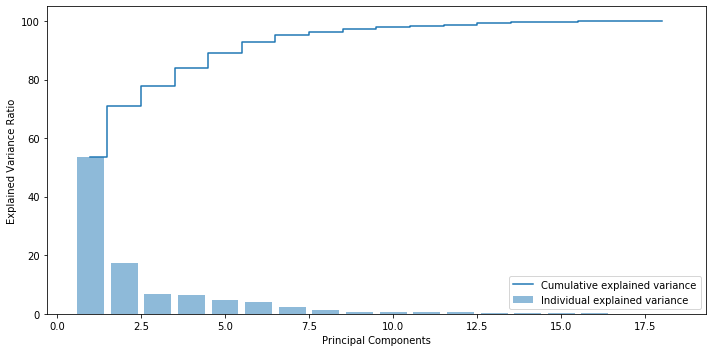

In [54]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

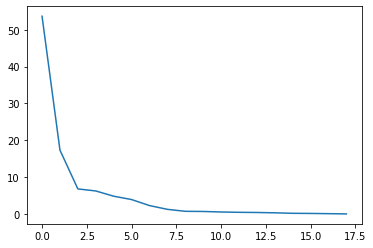

In [55]:
#Elbow Curve
plt.plot(var_exp)

In [56]:
#We have an elbow at 2 but that does not explain 95% variance
#We can observe an elbow at 8 which can explain 95% variance

#Apply PCA with 8 components
pca = PCA(n_components=8)
data_reduced = pca.fit_transform(X)
data_reduced.transpose()

array([[ 0.6792154 , -1.99094287,  4.35191626, ...,  5.04099298,
        -3.4309065 , -4.41656114],
       [-0.2961837 , -0.30796329,  0.56076246, ...,  0.12343789,
        -1.25573996,  0.54965077],
       [-1.03022473,  0.08569756, -1.02659824, ..., -0.81769511,
         2.08806548,  1.68626461],
       ...,
       [ 1.57136052,  0.14117643,  0.75555792, ..., -0.57597625,
        -0.21951195, -0.44977023],
       [-0.50902391,  0.34128766,  0.77206137, ...,  0.90007807,
        -0.34376322, -0.31534254],
       [-0.58571326, -0.1058677 ,  0.12016319, ..., -0.37644743,
         0.23402975, -0.10723385]])

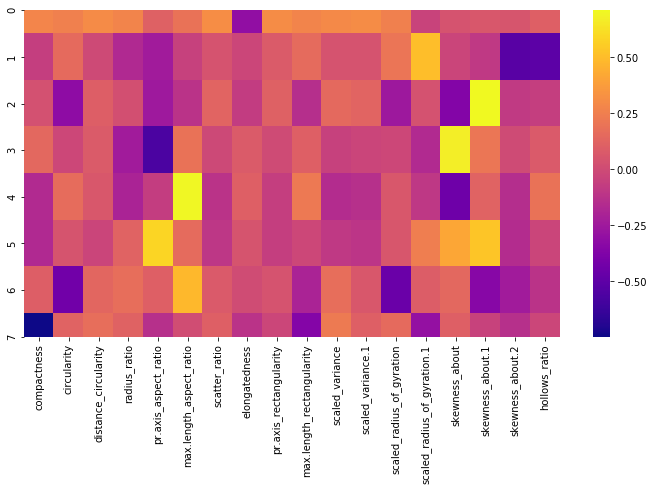

In [57]:
#Display the prinicipal components
df_comp = pd.DataFrame(pca.components_,columns=list(X))
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [58]:
#Group 1 is more related to scaled_radius_of_gyration.1
#Group 2 is more related to skewness_about.2
#Group 3 is more related to skewness_about
#Group 4 is more related to max.length_rectangularity
#Group 5 is more related to pr.axis_aspect_ratio and skewness_about.1

In [59]:
#Split the reduced data into train and test
X_train, X_test, y_train, y_test = train_test_split(data_reduced, Y, test_size=0.3, random_state=42)

In [60]:
# Perform GridSearch to obtain hyperparameters 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.525, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.526, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.773, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.788, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.776, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.944, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.894, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.884, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.833, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.888, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.525, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [61]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [62]:
#Build the SVM model with hyper parameters
model = SVC(gamma=0.01, C=100, kernel='rbf')
model.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
#Score of model
model.score(X_test , y_test)

0.9330708661417323

In [64]:
#Confusion Matrix
y_predict = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[ 54   3   1]
 [  4 112   2]
 [  2   5  71]]


In [65]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.90      0.93      0.92        58
           2       0.93      0.95      0.94       118
           3       0.96      0.91      0.93        78

    accuracy                           0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [67]:
#k-fold validation
results = cross_val_score(model, data_reduced, Y, cv=kfold)

results.mean()*100.0

94.44117647058823

In [68]:
#We can observe that model post PCA score is close to its kfold validated score

In [66]:
# Model Performance metrics before PCA
#          group  precision  recall  f1-score   support

#           1(van)  0.95      0.91      0.93        58
#           2(car)  0.95      0.99      0.97       118
#           3(bus)  0.99      0.95      0.97        78

#    accuracy                           0.96       254


# Model Performance metrics after PCA
#         group    precision  recall  f1-score   support

#          1(van)   0.90      0.93      0.92        58
#          2(car)   0.93      0.95      0.94       118
#          3(bus)   0.96      0.91      0.93        78

#    accuracy                           0.93       254

#Looks like by drop reducing dimensionality by 10, we only dropped around 2.7% in R^2! 
#Still seems easy to justify the dropping of variables. An out of sample (on test data), 
#with 8 independent variables is likely to do better since that would be less of an over-fit.